# 数据读入模块

In [189]:
import pandas as pd

train_data = pd.read_csv("data\main\df_train_b1.csv", index_col=0)
test_data = pd.read_csv('data\main\df_test_b1.csv', index_col=0)


## 要读入除了main之外的数在此处添加

In [190]:
import os
filenames = ["data\detail\df_basic_b1.csv",
             "data\detail\df_corp_b1.csv",
             "data\detail\df_judicial_b1.csv",
             "data\detail\df_loan2_b1.csv",
             "data\detail\df_query_b1.csv"]
for filename in filenames:
    temp = pd.read_csv(filename)
    train_data = pd.merge(train_data, temp, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, temp, on="cust_id",
                         how="left", suffixes=("", "_y"))


In [191]:
train_data['is_judicial']=[0 if pd.isna(i) else 1 for i in train_data['judicial_reason']]
test_data['is_judicial']=[0 if pd.isna(i) else 1 for i in test_data['judicial_reason']]

## 处理NAN

In [192]:
def delnan(df):
    df = df.dropna(how="all", axis=1)  # 删除全是空值的列
    df = df.fillna(-99)
    return df


In [193]:
df_train = delnan(train_data)
df_test = delnan(test_data)


In [194]:
""" for i in range(2, 17):
    print(df_train.iloc[:, i].value_counts()) """


' for i in range(2, 17):\n    print(df_train.iloc[:, i].value_counts()) '

In [195]:
type_col = ["basic_1",
            "basic_10",
            "basic_12",
            "basic_14",
            "loan1_16",
            "loan1_20",
            "loan1_23",
            "loan1_25",]

## 转化为one-hot编码（不宜采用）

In [196]:

def to_one_hot(df, colnames):
    df = pd.get_dummies(df, columns=colnames)
    return df


""" df_train = to_one_hot(df_train, type_col)
df_test = to_one_hot(df_test, type_col)
for i in df_train.columns:
    if i not in df_test.columns:
        df_test[i] = 0
 """

' df_train = to_one_hot(df_train, type_col)\ndf_test = to_one_hot(df_test, type_col)\nfor i in df_train.columns:\n    if i not in df_test.columns:\n        df_test[i] = 0\n '

## 证据权重

In [197]:
import pandas as pd
import numpy as np

def cal_woe(df,df_no_label,x_cols,y_col):
    for i in x_cols:
        x_set=pd.unique(df[i])
        for j in x_set:
            woe=np.mean(df[df[i]==j][y_col])
            df[i].replace(j,woe,inplace=True)
            df_no_label[i].replace(j,woe,inplace=True)
    return df,df_no_label

In [198]:
df_train,df_test=cal_woe(df_train,df_test,type_col,"label")

In [199]:
full_col_name = list(df_train.columns)
basic_col = [i for i in full_col_name if "basic" in i]
loan_col = [i for i in full_col_name if "loan" in i]
overdue_col = [i for i in full_col_name if "overdue" in i]
query_col = [i for i in full_col_name if "query" in i]
judicial_col=[i for i in full_col_name if "judicial" in i]

""" for i in judicial_col:
    df_train[i].astype("float")
    df_test[i].astype("float") """

' for i in judicial_col:\n    df_train[i].astype("float")\n    df_test[i].astype("float") '

## 设置哪些x作为模型自变量输入

In [200]:
x_col = basic_col+['is_judicial']+loan_col+query_col+overdue_col
# x_col为模型读入的自变量列名称


""" x_col=['loan2_3_y',
 'loan1_6',
 'loan1_32',
 'loan1_31',
 'basic_7',
 'loan2_4_y',
 'loan2_3',
 'loan1_15',
 'loan2_5_y',
 'loan1_30',
 'loan1_7',
 'loan1_3',
 'query_1',
 'query_7',
 'loan1_17',
 'query_4',
 'loan1_14',
 'basic_1_y',
 'loan1_21',
 'query_1_y'] """

" x_col=['loan2_3_y',\n 'loan1_6',\n 'loan1_32',\n 'loan1_31',\n 'basic_7',\n 'loan2_4_y',\n 'loan2_3',\n 'loan1_15',\n 'loan2_5_y',\n 'loan1_30',\n 'loan1_7',\n 'loan1_3',\n 'query_1',\n 'query_7',\n 'loan1_17',\n 'query_4',\n 'loan1_14',\n 'basic_1_y',\n 'loan1_21',\n 'query_1_y'] "

In [201]:
# df_train.drop(columns=drop_col)

# 训练模型

## 划分测试集训练集

In [202]:
""" from sklearn import model_selection


X = df_train[x_col]
Y = df_train["label"]
seed = 666
test_size = 0.1
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, test_size=test_size, random_state=seed) """


' from sklearn import model_selection\n\n\nX = df_train[x_col]\nY = df_train["label"]\nseed = 666\ntest_size = 0.1\nX_train, X_test, y_train, y_test = model_selection.train_test_split(\n    X, Y, test_size=test_size, random_state=seed) '

## 训练模型

## 超参数

In [203]:
N = 1000
num_round = 100

max_depth = [3, 4, 5,6,7,8]
eta = [0.1,0.06]
colsample_bytree = [0.8,0.7, 0.6,0.5]
scale_pos_weight = [1, 3, 6, 10,20, 30]
test_size=[0.3,0.5,0.7]
subsample=[0.7,0.6,0.5,0.4]
par_lambda=[1,1.5,2,3]
alpha=[0,0.2,0.4,0.6,0.8]
min_child_weight=[1,2,3,4,5,6,10]


In [204]:
import copy
import xgboost as xgb
import random
from sklearn import model_selection
from sklearn.metrics import roc_auc_score


pred_labels = []
test_labels = []
loss_seq = []
max_auc_loss = 0
flag=0
X = df_train[x_col]
Y = df_train["label"]
x_perd = xgb.DMatrix(df_test[x_col])

for i in range(N):

    #seed = 666
    test_size_this_round=random.choice(test_size)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, Y, test_size=test_size_this_round)
    # seed+=1

    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    evallist = [(dtest, 'eval')]

    param = {
        'max_depth': random.choice(max_depth),
        'eta': random.choice(eta),
        'colsample_bytree': random.choice(colsample_bytree),
        'objective': 'binary:logistic',
        #'verbosity':0,
        'scale_pos_weight': random.choice(scale_pos_weight),
        'eval_metric': 'auc',
        'subsample':random.choice(subsample),
        'alpha':random.choice(alpha),
        'lambda':random.choice(par_lambda),
        'min_child_weight':random.choice(min_child_weight),
        #'seed': 666,
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        #"enable_enable_categorical":True,
    }
    
    bst = xgb.train(param, dtrain, num_round, evals=evallist,
                    early_stopping_rounds=10, verbose_eval=False)
    loss = float(bst.eval(dtest).split(":")[1])
    pred_label = list(bst.predict(x_perd))
    test_label = list(bst.predict(xgb.DMatrix(X_test)))
    # temp=roc_auc_score(y_test,test_label)
    # print(test_label[0:10])

    loss_seq.append(loss)

    temp_dict={"auc":loss,'test_size':test_size_this_round}
    temp_dict.update(param)

    #info_df=info_df.append(pd.DataFrame(temp_dict))
    if flag==0:
        info_df=pd.DataFrame(temp_dict,index=[i])
        flag=1
    else:
        info_df=pd.concat([info_df,pd.DataFrame(temp_dict,index=[i])])

    if loss > max_auc_loss:
        best_bst = copy.deepcopy(bst)
        max_auc_loss = loss
    

    print(i+1, ":", loss, sep="")
    #print(param)
    #print("-------------------------")
    pred_labels.append([j for j in pred_label])
    test_labels.append(copy.deepcopy(test_label))


print('最大AUC:', max(loss_seq), sep="")

1:0.6980047514755559
2:0.6827183291921315
3:0.6705886602652035
4:0.5
5:0.7168174861040252
6:0.7043881474431686
7:0.6735924687717704
8:0.7030773946360154
9:0.6905539785441699
10:0.6647016042381961
11:0.7229756552503126
12:0.7121068106603279
13:0.6790530614533493
14:0.7118508763160678
15:0.7137469796829128
16:0.6663148181282602
17:0.703914646299541
18:0.68150963541021
19:0.676073383376339
20:0.7051167452392442
21:0.6923415883612316
22:0.6880669749427722
23:0.6985308246349143
24:0.7053350594129224
25:0.7039113618961437
26:0.700484230306344
27:0.7096112385370451
28:0.7263490087415445
29:0.6946320660543972
30:0.7211704371165644
31:0.681676538159801
32:0.7407644999477283
33:0.7128596319621554
34:0.6950467089577081
35:0.6946630269356202
36:0.6923201210410471
37:0.7158020479467843
38:0.6892987735619517
39:0.7012652883759897
40:0.6736021255550708
41:0.7016655582649819
42:0.6856889709906951
43:0.7335101860496133
44:0.6911445600565713
45:0.7159766883049422
46:0.748946227602528
47:0.68377098102036

In [205]:
info_df

,auc,test_size,max_depth,eta,colsample_bytree,objective,scale_pos_weight,eval_metric,subsample,alpha,lambda,min_child_weight,tree_method,gpu_id
0,0.698005,0.5,6,0.06,0.7,binary:logistic,30,auc,0.4,0.8,2.0,6,gpu_hist,0
1,0.682718,0.7,3,0.10,0.7,binary:logistic,10,auc,0.5,0.0,1.5,5,gpu_hist,0
2,0.670589,0.7,8,0.10,0.5,binary:logistic,30,auc,0.7,0.0,1.5,4,gpu_hist,0
3,0.500000,0.7,7,0.06,0.6,binary:logistic,1,auc,0.6,0.8,1.5,5,gpu_hist,0
4,0.716817,0.3,5,0.06,0.8,binary:logistic,3,auc,0.4,0.8,2.0,4,gpu_hist,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.739961,0.5,3,0.06,0.7,binary:logistic,10,auc,0.7,0.6,1.5,10,gpu_hist,0
996,0.686492,0.5,4,0.06,0.6,binary:logistic,10,auc,0.4,0.6,1.5,3,gpu_hist,0
997,0.702738,0.7,8,0.10,0.7,binary:logistic,3,auc,0.4,0.0,2.0,10,gpu_hist,0
998,0.729085,0.5,8,0.06,0.6,binary:logistic,1,auc,0.7,0.8,3.0,10,gpu_hist,0


In [206]:
info_df.to_csv("info.csv",encoding="utf-8",index=False)

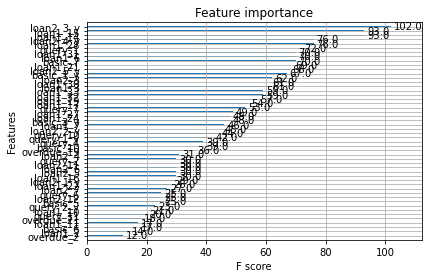

In [207]:
pic=xgb.plot_importance(best_bst,max_num_features=50)
temp=pic.get_ymajorticklabels()
important_x=[str(i).split("\'")[1] for i in temp]
important_x.reverse()

In [208]:
important_x

['loan2_3_y',
 'loan1_15',
 'loan1_14',
 'loan2_4_y',
 'loan1_28',
 'query_1',
 'loan1_31',
 'loan1_6',
 'basic_7',
 'loan1_21',
 'loan2_5_y',
 'basic_1_y',
 'loan2_3',
 'loan1_30',
 'loan1_3',
 'loan1_33',
 'loan1_32',
 'loan1_19',
 'loan1_17',
 'query_7',
 'loan1_27',
 'loan1_24',
 'basic_3_y',
 'loan1_7',
 'loan2_2_y',
 'query_10',
 'query_1_y',
 'query_4',
 'basic_10',
 'overdue_19',
 'loan2_4',
 'query_2',
 'loan2_11',
 'loan2_6',
 'loan2_5',
 'loan1_16',
 'loan2_1_y',
 'loan1_22',
 'loan2_7',
 'query_6',
 'loan2_12',
 'basic_5',
 'query_2_y',
 'loan1_10',
 'query_11',
 'overdue_21',
 'loan1_11',
 'basic_6',
 'loan1_2',
 'overdue_2']

* basic_7:年龄
* 

# 输出模块

In [210]:
import time
import numpy as np
from sklearn.metrics import roc_auc_score

date = time.strftime("%Y%m%d-%H%M%S", time.localtime())
res_num = np.argsort([-i for i in loss_seq])

# 选择前n个结果进行平均（手动指定or在本地测试集排序选出）
if False:
    max_auc = -1
    list_temp = []
    for i in range(N):
        list_temp.append(test_labels[res_num[i]])
        temp = np.mean(list_temp, axis=0)
        temp_auc = roc_auc_score(y_test, temp)
        print(i, temp_auc)
        if temp_auc > max_auc:
            max_auc = temp_auc
            n = i
else:
    n = 200

res_num = res_num[0:n]

final_pred_label = np.mean([pred_labels[i] for i in res_num], axis=0)
#local_auc = roc_auc_score(y_test, final_pred_label)
print("本地测试集前", n, "个auc为", [loss_seq[i] for i in res_num], sep="")
# print("平均之后最大AUC为",max_auc,sep="")

res = pd.DataFrame({
    'cust_id': list(df_test["cust_id"]),
    'label': final_pred_label,
})
res.to_csv("./output/result"+date+".csv", encoding="utf-8", index=False)


本地测试集前200个auc为[0.7767197797902077, 0.7643300384286016, 0.7602680318093326, 0.7597283194955957, 0.7554085663317315, 0.7541929711245771, 0.7541502065486223, 0.7533058099794941, 0.7531734791524265, 0.7520622334487601, 0.7519427035476153, 0.7500180225185022, 0.7497268765267896, 0.7493431662480253, 0.748946227602528, 0.7488525870470788, 0.7486232451379868, 0.7478447053637063, 0.7476497642852641, 0.7469848619914632, 0.7468517961211153, 0.7460229445506692, 0.7457905441451054, 0.7455569953314879, 0.7445157160574499, 0.7440296739977333, 0.7439523862553671, 0.7432919343072187, 0.7430765836756859, 0.7426711846987815, 0.7425598678777869, 0.7423648361004683, 0.7422718932985677, 0.7416933576066745, 0.7415128889671224, 0.740906471907601, 0.7408593671407756, 0.7408294391487475, 0.7407644999477283, 0.7403021099697461, 0.7402097627663475, 0.7400304761523034, 0.7399719958851096, 0.7399608472425409, 0.7399376904828193, 0.7396363269017072, 0.7395134876094593, 0.7393782200222244, 0.7393565216014225, 0.73929

# 一些tips

* 提升n有一定提升(如何确定n？)
  * n=40 0.6763
  * n=10 0.6728
  * n=100 0.6774
  * 太大也不好

# 一些进展

* 随机参数
* XGB模型
* 本地测试集auc较高（0.75+）
* 部分类型变量进行了one-hot处理
* 把细分表除了loan与主表合并

# tbd

* 处理细分表的loan，给出指标
* 确定变量类型，以便对所有（or重要）分类变量进行one-hot处理
* 新模型？